In [1]:
import resource

memory_limit = 100 * 1024**3 # 100GB
resource.setrlimit(resource.RLIMIT_AS, (memory_limit, memory_limit))

In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE





In [3]:
from umap import UMAP

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



In [6]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [7]:
data_snp_phenotype = pd.read_csv('../data/significant_features.csv', sep=',')
#data_snp_phenotype = pd.read_pickle('/mnt/users/ib_2025/Corn_ML_project/data/012_recoded_X_subset_ib_2025.pkl.gz')


In [34]:
data_snp_phenotype

,NC_024462.2:206871693,NC_024463.2:4784084,NC_024462.2:244553946,NC_024462.2:165118777,NC_024463.2:8980878,NC_024462.2:226474077,NC_024463.2:10159666,NC_024462.2:239603308,NC_024463.2:59313,NC_024462.2:218655282,...,NC_024461.2:211562404,NC_024461.2:220062353,NC_024461.2:170135308,NC_024461.2:198470607,NC_024461.2:170135176,NC_024461.2:163393469,NC_024461.2:214689289,NC_024461.2:156840528,NC_024461.2:198470660,NC_024461.2:177339192
0,0,2,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,2,2,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
2,0,1,1,0,0,0,1,1,0,0,...,1,0,1,1,1,0,0,0,0,0
3,2,2,2,0,0,0,1,2,0,0,...,1,0,1,0,1,1,0,0,0,0
4,0,2,0,0,1,0,1,2,0,1,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,2,1,0,0,0,1,2,0,0,...,0,0,0,1,0,0,0,1,1,0
600,0,2,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
601,0,2,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
602,0,2,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0


In [ ]:

#data_snp_phenotype_group = pd.read_pickle('/mnt/users/ib_2025/Corn_ML_project/data/012_recoded_X_full_ib_2025.pkl.gz')


In [8]:
# Divide the data into X as a data for learning models aka features and y as a data the model should predict aka target
X = data_snp_phenotype.drop(columns=["Heterotic group"])
y = data_snp_phenotype["Heterotic group"]  # гетерозисная группа

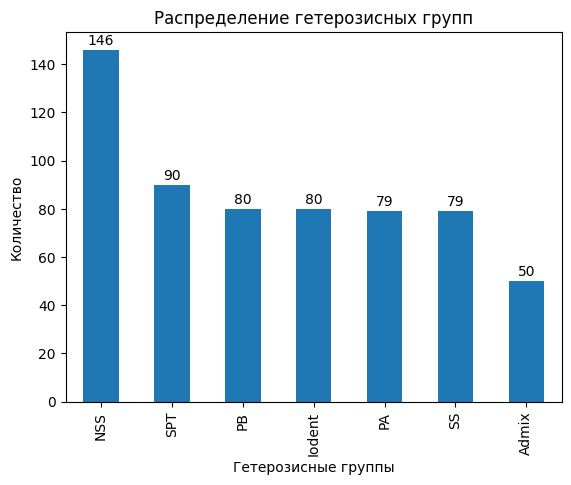

In [9]:
y.value_counts().plot(kind='bar')
counts = y.value_counts()
ax = counts.plot(kind='bar')
plt.title('Распределение гетерозисных групп')
plt.xlabel('Гетерозисные группы')
plt.ylabel('Количество')

for i, count in enumerate(counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)


In [37]:
X

,NC_024462.2:206871693,NC_024463.2:4784084,NC_024462.2:244553946,NC_024462.2:165118777,NC_024463.2:8980878,NC_024462.2:226474077,NC_024463.2:10159666,NC_024462.2:239603308,NC_024463.2:59313,NC_024462.2:218655282,...,NC_024461.2:211562404,NC_024461.2:220062353,NC_024461.2:170135308,NC_024461.2:198470607,NC_024461.2:170135176,NC_024461.2:163393469,NC_024461.2:214689289,NC_024461.2:156840528,NC_024461.2:198470660,NC_024461.2:177339192
0,0,2,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,2,2,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
2,0,1,1,0,0,0,1,1,0,0,...,1,0,1,1,1,0,0,0,0,0
3,2,2,2,0,0,0,1,2,0,0,...,1,0,1,0,1,1,0,0,0,0
4,0,2,0,0,1,0,1,2,0,1,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,2,1,0,0,0,1,2,0,0,...,0,0,0,1,0,0,0,1,1,0
600,0,2,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
601,0,2,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
602,0,2,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0


In [38]:
y

0      NSS
1      SPT
2      NSS
3       PB
4       PA
      ... 
599     PA
600     PA
601     PA
602     PA
603    NSS
Name: Heterotic group, Length: 604, dtype: object

PCA

<Axes: >

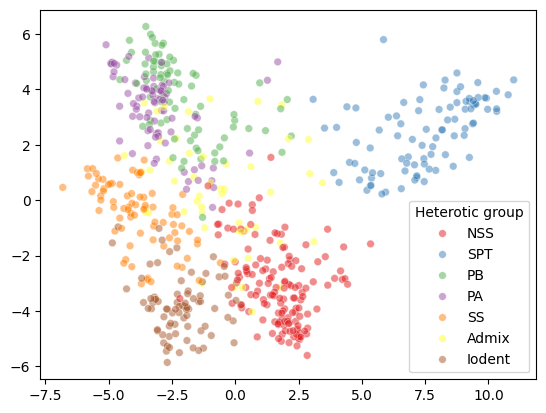

In [10]:

pca = PCA()

principal_components = pca.fit_transform(X)
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=y, palette='Set1', 
    alpha=0.5, 
    s=30 
)

TSNE

<Axes: >

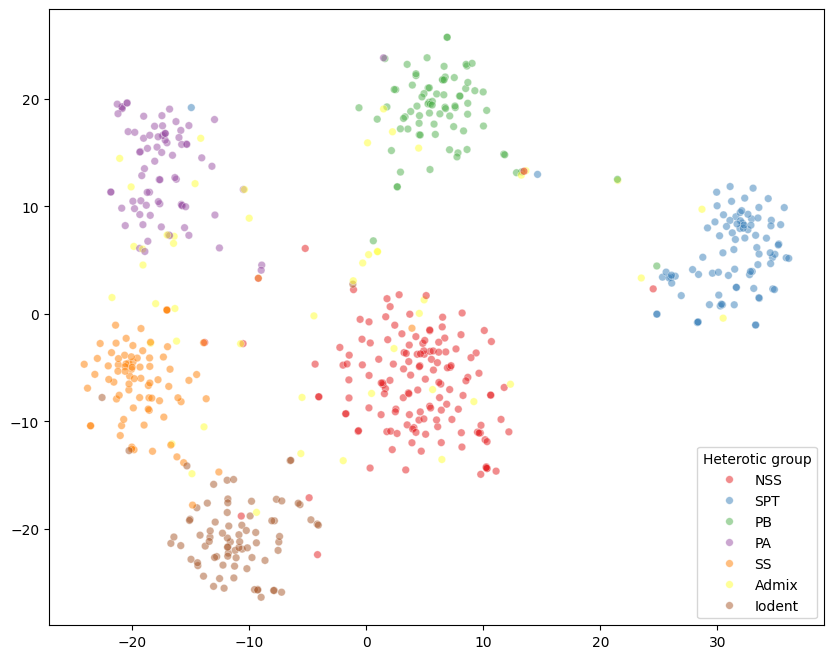

In [50]:
TSNE_ = TSNE(perplexity=30).fit_transform(X)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=TSNE_[:, 0], y=TSNE_[:, 1], hue=y,  palette='Set1', alpha=0.5, s=30)

UMAP

In [42]:
umap_model = UMAP(n_neighbors=25, min_dist= 0.4)
#umap_model_MinMaxScaler = UMAP()
#umap_model_RobustScaler = UMAP()

UMAP_ = umap_model.fit_transform(X)
#UMAP_MinMaxScaler = umap_model_MinMaxScaler.fit_transform(data_snp_phenotype_MinMaxScaler)
#UMAP_RobustScaler = umap_model_RobustScaler.fit_transform(data_snp_phenotype_RobustScaler)


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


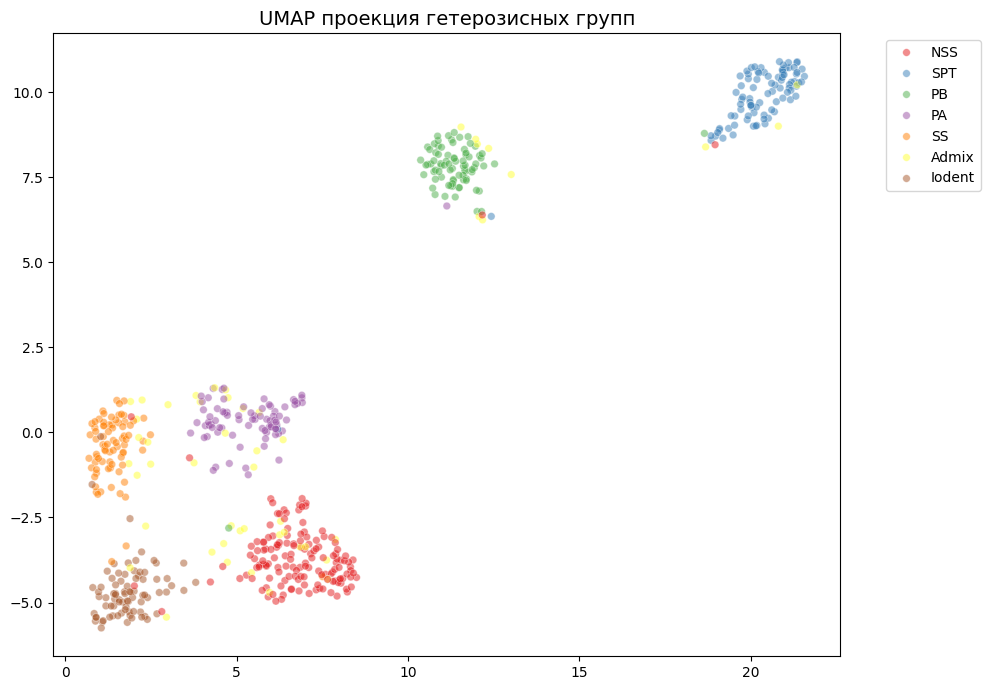

In [44]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=UMAP_[:, 0], y=UMAP_[:, 1], hue=y,  palette='Set1', alpha=0.5, s=30)
plt.title('UMAP проекция гетерозисных групп', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [106]:
#data_snp_phenotype = data_snp_phenotype.drop(columns=['Subgroup'])

In [107]:
#def standardize_genotypes(data_snp_phenotype):
    #for col in data_snp_phenotype.columns[1:]:
        #data_snp_phenotype.loc[:, col] = data_snp_phenotype[col].apply(lambda x: '|'.join(sorted(x.split('|'))))

    #return data_snp_phenotype

#standardize_genotypes(data_snp_phenotype)

In [108]:
#df_wo_hetero_group = data_snp_phenotype.drop(columns=['Heterotic group'])
#all_values = df_wo_hetero_group.values.flatten()
#unique_values = pd.unique(all_values)
#unique_values

In [ ]:
# Divide the data into X as a data for learning models aka features and y as a data the model should predict aka target
#X = data_snp_phenotype # Генотипы
#y = data_snp_phenotype_group["Heterotic group"]  # гетерозисная группа

In [112]:
#def genotype_to_numeric(genotype, heterozygote):
    #alleles = genotype.split('|')
    
    #if alleles[0] != alleles[1]:
        #return 0
    #if alleles[0] == heterozygote[0]:
        #return 1
    #elif alleles[0] == heterozygote[1]:
        #return 2

    #return -1

#for column in X.columns:
    #heterozygote = None
    #first_genotype = None  
    #for idx, genotype in enumerate(X[column]):
       # alleles = genotype.split('|')
        
        #if alleles[0] == alleles[1]:
        #    if first_genotype is None:  
        #        first_genotype = genotype
        
        #if alleles[0] != alleles[1]:
          #  heterozygote = alleles
          #  break

   # if heterozygote is None:

       # X[column] = X[column].apply(lambda x: 1 if x == first_genotype else 2)
    #else:
        #X[column] = X[column].apply(lambda x: genotype_to_numeric(x, heterozygote))

#X


In [11]:
X.dtypes

NC_024462.2:206871693    int64
NC_024463.2:4784084      int64
NC_024462.2:244553946    int64
NC_024462.2:165118777    int64
NC_024463.2:8980878      int64
                         ...  
NC_024461.2:163393469    int64
NC_024461.2:214689289    int64
NC_024461.2:156840528    int64
NC_024461.2:198470660    int64
NC_024461.2:177339192    int64
Length: 516, dtype: object

In [12]:
X = X.astype('int8')


In [13]:
X.dtypes

NC_024462.2:206871693    int8
NC_024463.2:4784084      int8
NC_024462.2:244553946    int8
NC_024462.2:165118777    int8
NC_024463.2:8980878      int8
                         ... 
NC_024461.2:163393469    int8
NC_024461.2:214689289    int8
NC_024461.2:156840528    int8
NC_024461.2:198470660    int8
NC_024461.2:177339192    int8
Length: 516, dtype: object

In [54]:
X.shape

(604, 516)

In [55]:
y.shape

(604,)

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [16]:
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=10,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    cat_features=X.columns.tolist(),  
    verbose=100,
    random_seed=42,
    early_stopping_rounds=20,
    used_ram_limit='32gb',
    thread_count=1,
    bagging_temperature = 0.8
)

In [17]:
model.fit(
    X_train,
    y_train,
    eval_set=(X_val, y_val),
    use_best_model=True,
    verbose=10
)

0:	learn: 0.4141477	test: 0.4032050	best: 0.4032050 (0)	total: 487ms	remaining: 48.3s
10:	learn: 0.6154196	test: 0.6087314	best: 0.6087314 (10)	total: 4.9s	remaining: 39.7s
20:	learn: 0.6388767	test: 0.6249919	best: 0.6249919 (20)	total: 9.37s	remaining: 35.3s
30:	learn: 0.7100786	test: 0.6421601	best: 0.6568446 (25)	total: 13.7s	remaining: 30.5s
40:	learn: 0.7397312	test: 0.6788623	best: 0.6828460 (35)	total: 18.1s	remaining: 26.1s
50:	learn: 0.7578523	test: 0.7274349	best: 0.7274349 (45)	total: 22.7s	remaining: 21.8s
60:	learn: 0.7696619	test: 0.7107341	best: 0.7274349 (45)	total: 27.2s	remaining: 17.4s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.7274348751
bestIteration = 45

Shrink model to first 46 iterations.


In [18]:
train_accuracy_filtered_data = accuracy_score(y_train, model.predict(X_train))
test_accuracy_filtered_data = accuracy_score(y_test, model.predict(X_test))
print(f"Train accuracy: {train_accuracy_filtered_data}")
print(f"Test accuracy: {test_accuracy_filtered_data}")

train_precision = precision_score(y_train, model.predict(X_train), average='weighted')
test_precision = precision_score(y_test, model.predict(X_test), average='weighted')
print(f"Train precision: {train_precision}")
print(f"Test precision: {test_precision}")

train_recall = recall_score(y_train, model.predict(X_train), average='weighted')
test_recall = recall_score(y_test, model.predict(X_test), average='weighted')
print(f"Train recall: {train_recall}")
print(f"Test recall: {test_recall}")

train_f1 = f1_score(y_train, model.predict(X_train), average='weighted')
test_f1 = f1_score(y_test, model.predict(X_test), average='weighted')
print(f"Train F1-score: {train_f1}")
print(f"Test F1-score: {test_f1}")

train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Test ROC AUC: {test_roc_auc}")

Train accuracy: 0.7908902691511387
Test accuracy: 0.7377049180327869
Train precision: 0.7556236552925676
Test precision: 0.7471766848816028
Train recall: 0.7908902691511387
Test recall: 0.7377049180327869


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train F1-score: 0.758663259694903
Test F1-score: 0.7026965748277223
Train ROC AUC: 0.9774596413106007
Test ROC AUC: 0.9561331915867249


In [19]:
train_precision = precision_score(y_train, model.predict(X_train), average=None)
test_precision = precision_score(y_test, model.predict(X_test), average=None)


train_recall = recall_score(y_train, model.predict(X_train), average=None)
test_recall = recall_score(y_test, model.predict(X_test), average=None)


train_f1 = f1_score(y_train, model.predict(X_train), average=None)
test_f1 = f1_score(y_test, model.predict(X_test), average=None)


classes = model.classes_

print("Train:")
for i, cls in enumerate(classes):
    print(f"{cls}: Precision={train_precision[i]:.3f}, Recall={train_recall[i]:.3f}, F1={train_f1[i]:.3f}")

print("\nTest:")
for i, cls in enumerate(classes):
    print(f"{cls}: Precision={test_precision[i]:.3f}, Recall={test_recall[i]:.3f}, F1={test_f1[i]:.3f}")


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.887, Recall=0.859, F1=0.873
NSS: Precision=0.608, Recall=0.966, F1=0.746
PA: Precision=0.883, Recall=0.841, F1=0.862
PB: Precision=0.934, Recall=0.891, F1=0.912
SPT: Precision=0.946, Recall=0.972, F1=0.959
SS: Precision=0.850, Recall=0.540, F1=0.660

Test:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.800, Recall=0.500, F1=0.615
NSS: Precision=0.519, Recall=0.933, F1=0.667
PA: Precision=0.800, Recall=1.000, F1=0.889
PB: Precision=1.000, Recall=0.875, F1=0.933
SPT: Precision=1.000, Recall=1.000, F1=1.000
SS: Precision=1.000, Recall=0.375, F1=0.545


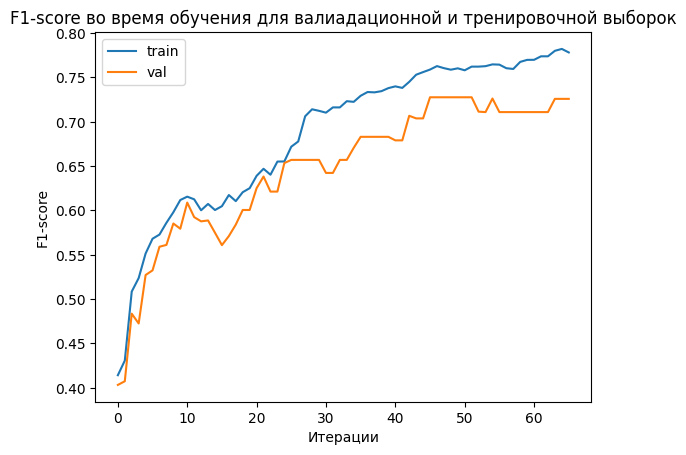

In [21]:
results = model.evals_result_
plt.plot(results['learn']['TotalF1'], label='train')
plt.plot(results['validation']['TotalF1'], label='val')
plt.legend()
plt.title('F1-score во время обучения для валиадационной и тренировочной выборок')
plt.xlabel('Итерации')
plt.ylabel('F1-score')
plt.show()

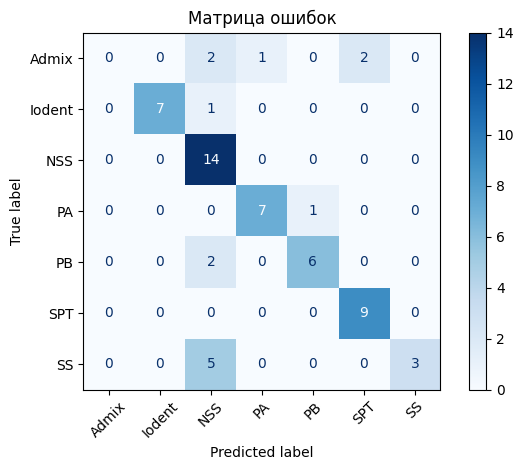

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_val)
class_names = sorted(set(y_val))

cm = confusion_matrix(y_val, y_pred, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)  
plt.title("Матрица ошибок")
plt.tight_layout()
plt.show()

Кросс-валидацию теперь добавляем

In [23]:
from sklearn.model_selection import StratifiedKFold

In [24]:
train_accs, test_accs = [], []
train_precisions, test_precisions = [], []
train_recalls, test_recalls = [], []
train_f1s, test_f1s = [], []
train_rocs, test_rocs = [], []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):


    
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]


    model.Kfold = CatBoostClassifier(
    iterations=100,
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=10,
    loss_function='MultiClass',
    eval_metric='TotalF1',    
    cat_features=X.columns.tolist(),  
    verbose=100,
    random_seed=42,
    early_stopping_rounds=20,
    used_ram_limit='32gb',
    thread_count=1,
    bagging_temperature = 0.8)

    model.Kfold.fit(
    X_train_fold,
    y_train_fold,
    eval_set=(X_val_fold, y_val_fold),
    use_best_model=True,
    verbose=10)

    print(f"\033[1mFold {fold+1}\033[0m")

    train_accuracy = accuracy_score(y_train, model.Kfold.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.Kfold.predict(X_test))
    print(f"Train accuracy: {train_accuracy}")
    print(f"Test accuracy: {test_accuracy}")

    train_precision = precision_score(y_train, model.Kfold.predict(X_train), average='weighted')
    test_precision = precision_score(y_test, model.Kfold.predict(X_test), average='weighted')
    print(f"Train precision: {train_precision}")
    print(f"Test precision: {test_precision}")

    train_recall = recall_score(y_train, model.Kfold.predict(X_train), average='weighted')
    test_recall = recall_score(y_test, model.Kfold.predict(X_test), average='weighted')
    print(f"Train recall: {train_recall}")
    print(f"Test recall: {test_recall}")

    train_f1 = f1_score(y_train, model.Kfold.predict(X_train), average='weighted')
    test_f1 = f1_score(y_test, model.Kfold.predict(X_test), average='weighted')
    print(f"Train F1-score: {train_f1}")
    print(f"Test F1-score: {test_f1}")

    train_roc_auc = roc_auc_score(y_train, model.Kfold.predict_proba(X_train), multi_class='ovr')
    test_roc_auc = roc_auc_score(y_test, model.Kfold.predict_proba(X_test), multi_class='ovr')


    train_accs.append(train_accuracy)
    test_accs.append(test_accuracy)
    train_precisions.append(train_precision)
    test_precisions.append(test_precision)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
    train_rocs.append(train_roc_auc)
    test_rocs.append(test_roc_auc)


    print(f"Train ROC AUC: {train_roc_auc}")
    print(f"Test ROC AUC: {test_roc_auc}")

    train_precision_ = precision_score(y_train, model.predict(X_train), average=None)
    test_precision_ = precision_score(y_test, model.predict(X_test), average=None)


    train_recall_ = recall_score(y_train, model.predict(X_train), average=None)
    test_recall_ = recall_score(y_test, model.predict(X_test), average=None)


    train_f1_ = f1_score(y_train, model.predict(X_train), average=None)
    test_f1_ = f1_score(y_test, model.predict(X_test), average=None)


    classes = model.classes_

    print("Train:")
    for i, cls in enumerate(classes):
        print(f"{cls}: Precision={train_precision_[i]:.3f}, Recall={train_recall_[i]:.3f}, F1={train_f1_[i]:.3f}")

    print("\nTest:")
    for i, cls in enumerate(classes):
        print(f"{cls}: Precision={test_precision_[i]:.3f}, Recall={test_recall_[i]:.3f}, F1={test_f1_[i]:.3f}")

    fold_labels = [f"Fold {i+1}" for i in range(len(train_accs))]


print("\n\033[1mСреднее метрик каждого фолда:\033[0m")
print(f"Mean Train Accuracy: {np.mean(train_accs):.4f}")
print(f"Mean Test Accuracy: {np.mean(test_accs):.4f}")
print(f"Mean Train Precision: {np.mean(train_precisions):.4f}")
print(f"Mean Test Precision: {np.mean(test_precisions):.4f}")
print(f"Mean Train Recall: {np.mean(train_recalls):.4f}")
print(f"Mean Test Recall: {np.mean(test_recalls):.4f}")
print(f"Mean Train F1-score: {np.mean(train_f1s):.4f}")
print(f"Mean Test F1-score: {np.mean(test_f1s):.4f}")
print(f"Mean Train ROC AUC: {np.mean(train_rocs):.4f}")
print(f"Mean Test ROC AUC: {np.mean(test_rocs):.4f}")


0:	learn: 0.5076429	test: 0.4882101	best: 0.4882101 (0)	total: 470ms	remaining: 46.6s
10:	learn: 0.6232059	test: 0.5778471	best: 0.6031150 (8)	total: 5.02s	remaining: 40.6s
20:	learn: 0.6741763	test: 0.6376538	best: 0.6376538 (20)	total: 9.37s	remaining: 35.2s
30:	learn: 0.7385144	test: 0.6746249	best: 0.6746249 (30)	total: 13.7s	remaining: 30.4s
40:	learn: 0.7477834	test: 0.6930816	best: 0.7015467 (37)	total: 18s	remaining: 25.9s
50:	learn: 0.7738999	test: 0.7232571	best: 0.7338949 (47)	total: 22.4s	remaining: 21.5s
60:	learn: 0.8037874	test: 0.7621858	best: 0.7621858 (60)	total: 26.7s	remaining: 17.1s
70:	learn: 0.8170264	test: 0.7631680	best: 0.7719547 (69)	total: 31.2s	remaining: 12.7s
80:	learn: 0.8226837	test: 0.7650939	best: 0.7731080 (72)	total: 35.8s	remaining: 8.4s
90:	learn: 0.8202765	test: 0.7650939	best: 0.7731080 (72)	total: 40.3s	remaining: 3.98s
99:	learn: 0.8252403	test: 0.7720204	best: 0.7814734 (97)	total: 44.2s	remaining: 0us

bestTest = 0.7814734174
bestIteration =

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train recall: 0.8405797101449275
Test recall: 0.8524590163934426
Train F1-score: 0.8069915682897351
Test F1-score: 0.8187613843351548
Train ROC AUC: 0.9823293156276183
Test ROC AUC: 0.9877447779768183


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.887, Recall=0.859, F1=0.873
NSS: Precision=0.608, Recall=0.966, F1=0.746
PA: Precision=0.883, Recall=0.841, F1=0.862
PB: Precision=0.934, Recall=0.891, F1=0.912
SPT: Precision=0.946, Recall=0.972, F1=0.959
SS: Precision=0.850, Recall=0.540, F1=0.660

Test:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.800, Recall=0.500, F1=0.615
NSS: Precision=0.519, Recall=0.933, F1=0.667
PA: Precision=0.800, Recall=1.000, F1=0.889
PB: Precision=1.000, Recall=0.875, F1=0.933
SPT: Precision=1.000, Recall=1.000, F1=1.000
SS: Precision=1.000, Recall=0.375, F1=0.545
0:	learn: 0.4888059	test: 0.4640372	best: 0.4640372 (0)	total: 450ms	remaining: 44.5s
10:	learn: 0.5722180	test: 0.5729185	best: 0.5769270 (1)	total: 5s	remaining: 40.4s
20:	learn: 0.6137811	test: 0.6315315	best: 0.6315315 (20)	total: 9.47s	remaining: 35.6s
30:	learn: 0.6483958	test: 0.6340911	best: 0.6376044 (28)	total: 14s	remaining: 31.2s
40:	lear

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train recall: 0.8364389233954451
Test recall: 0.8032786885245902
Train F1-score: 0.802891536986596
Test F1-score: 0.7773289097059589
Train ROC AUC: 0.984339309216162
Test ROC AUC: 0.9815223114971152


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.887, Recall=0.859, F1=0.873
NSS: Precision=0.608, Recall=0.966, F1=0.746
PA: Precision=0.883, Recall=0.841, F1=0.862
PB: Precision=0.934, Recall=0.891, F1=0.912
SPT: Precision=0.946, Recall=0.972, F1=0.959
SS: Precision=0.850, Recall=0.540, F1=0.660

Test:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.800, Recall=0.500, F1=0.615
NSS: Precision=0.519, Recall=0.933, F1=0.667
PA: Precision=0.800, Recall=1.000, F1=0.889
PB: Precision=1.000, Recall=0.875, F1=0.933
SPT: Precision=1.000, Recall=1.000, F1=1.000
SS: Precision=1.000, Recall=0.375, F1=0.545
0:	learn: 0.4871503	test: 0.4089260	best: 0.4089260 (0)	total: 418ms	remaining: 41.4s
10:	learn: 0.6300781	test: 0.5721905	best: 0.5738323 (9)	total: 4.64s	remaining: 37.5s
20:	learn: 0.6676751	test: 0.5825472	best: 0.6068727 (19)	total: 8.96s	remaining: 33.7s
30:	learn: 0.7359500	test: 0.6582097	best: 0.6645824 (28)	total: 13.3s	remaining: 29.7s
40:

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train recall: 0.8219461697722568
Test recall: 0.8524590163934426
Train F1-score: 0.7890394999266451
Test F1-score: 0.81524367008811
Train ROC AUC: 0.9817210197631265
Test ROC AUC: 0.9877405925454678


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.887, Recall=0.859, F1=0.873
NSS: Precision=0.608, Recall=0.966, F1=0.746
PA: Precision=0.883, Recall=0.841, F1=0.862
PB: Precision=0.934, Recall=0.891, F1=0.912
SPT: Precision=0.946, Recall=0.972, F1=0.959
SS: Precision=0.850, Recall=0.540, F1=0.660

Test:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.800, Recall=0.500, F1=0.615
NSS: Precision=0.519, Recall=0.933, F1=0.667
PA: Precision=0.800, Recall=1.000, F1=0.889
PB: Precision=1.000, Recall=0.875, F1=0.933
SPT: Precision=1.000, Recall=1.000, F1=1.000
SS: Precision=1.000, Recall=0.375, F1=0.545
0:	learn: 0.4365351	test: 0.3741769	best: 0.3741769 (0)	total: 448ms	remaining: 44.3s
10:	learn: 0.6042423	test: 0.5573478	best: 0.5599728 (9)	total: 5.02s	remaining: 40.6s
20:	learn: 0.6318716	test: 0.5903556	best: 0.5948775 (18)	total: 9.54s	remaining: 35.9s
30:	learn: 0.6691441	test: 0.6661536	best: 0.6661536 (30)	total: 14s	remaining: 31.2s
40:	l

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train recall: 0.865424430641822
Test recall: 0.8852459016393442
Train F1-score: 0.8289303773480807
Test F1-score: 0.8477988314053888
Train ROC AUC: 0.9821827897788072
Test ROC AUC: 0.9932229495571815


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.887, Recall=0.859, F1=0.873
NSS: Precision=0.608, Recall=0.966, F1=0.746
PA: Precision=0.883, Recall=0.841, F1=0.862
PB: Precision=0.934, Recall=0.891, F1=0.912
SPT: Precision=0.946, Recall=0.972, F1=0.959
SS: Precision=0.850, Recall=0.540, F1=0.660

Test:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.800, Recall=0.500, F1=0.615
NSS: Precision=0.519, Recall=0.933, F1=0.667
PA: Precision=0.800, Recall=1.000, F1=0.889
PB: Precision=1.000, Recall=0.875, F1=0.933
SPT: Precision=1.000, Recall=1.000, F1=1.000
SS: Precision=1.000, Recall=0.375, F1=0.545
0:	learn: 0.3940966	test: 0.3399963	best: 0.3399963 (0)	total: 460ms	remaining: 45.5s
10:	learn: 0.5972191	test: 0.5411215	best: 0.5578465 (8)	total: 5.05s	remaining: 40.9s
20:	learn: 0.6420630	test: 0.5995387	best: 0.6000000 (14)	total: 9.54s	remaining: 35.9s
30:	learn: 0.7286192	test: 0.6335332	best: 0.6335332 (30)	total: 14s	remaining: 31.2s
40:	l

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train recall: 0.8157349896480331
Test recall: 0.819672131147541
Train F1-score: 0.7793213066837779
Test F1-score: 0.7893965063736164
Train ROC AUC: 0.9708734484658684
Test ROC AUC: 0.9660189085625627
Train:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.887, Recall=0.859, F1=0.873
NSS: Precision=0.608, Recall=0.966, F1=0.746
PA: Precision=0.883, Recall=0.841, F1=0.862
PB: Precision=0.934, Recall=0.891, F1=0.912
SPT: Precision=0.946, Recall=0.972, F1=0.959
SS: Precision=0.850, Recall=0.540, F1=0.660

Test:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.800, Recall=0.500, F1=0.615
NSS: Precision=0.519, Recall=0.933, F1=0.667
PA: Precision=0.800, Recall=1.000, F1=0.889
PB: Precision=1.000, Recall=0.875, F1=0.933
SPT: Precision=1.000, Recall=1.000, F1=1.000
SS: Precision=1.000, Recall=0.375, F1=0.545

Среднее метрик каждого фолда:
Mean Train Accuracy: 0.8360
Mean Test Accuracy: 0.8426
Mean Train Precision: 0.7770
Mean Test Precision: 0.7985
Mean Trai

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


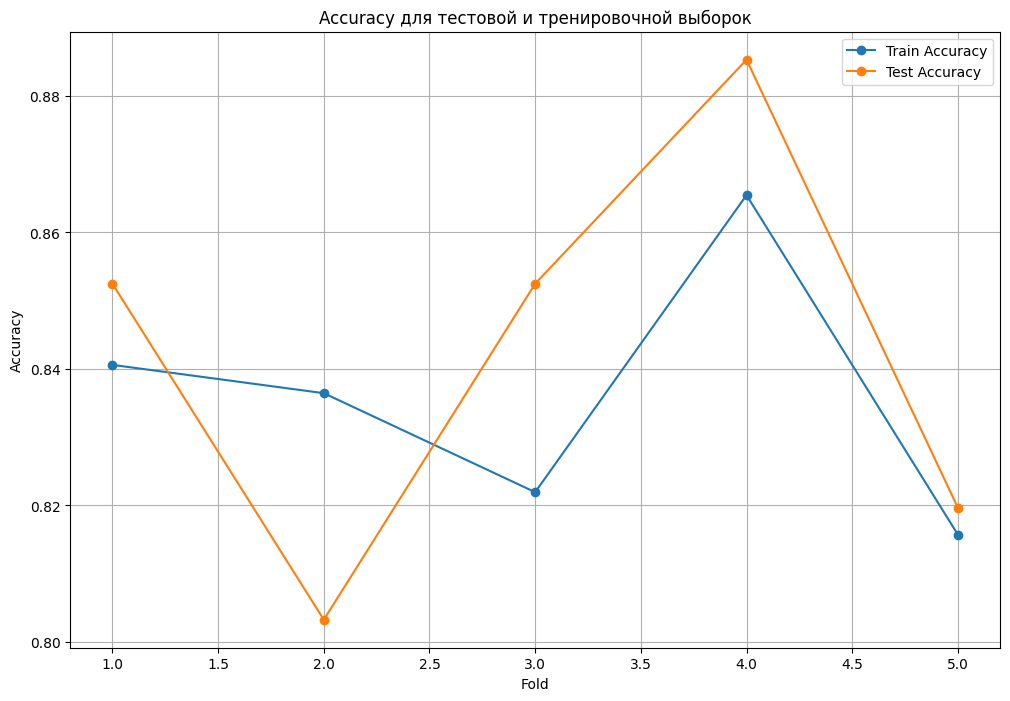

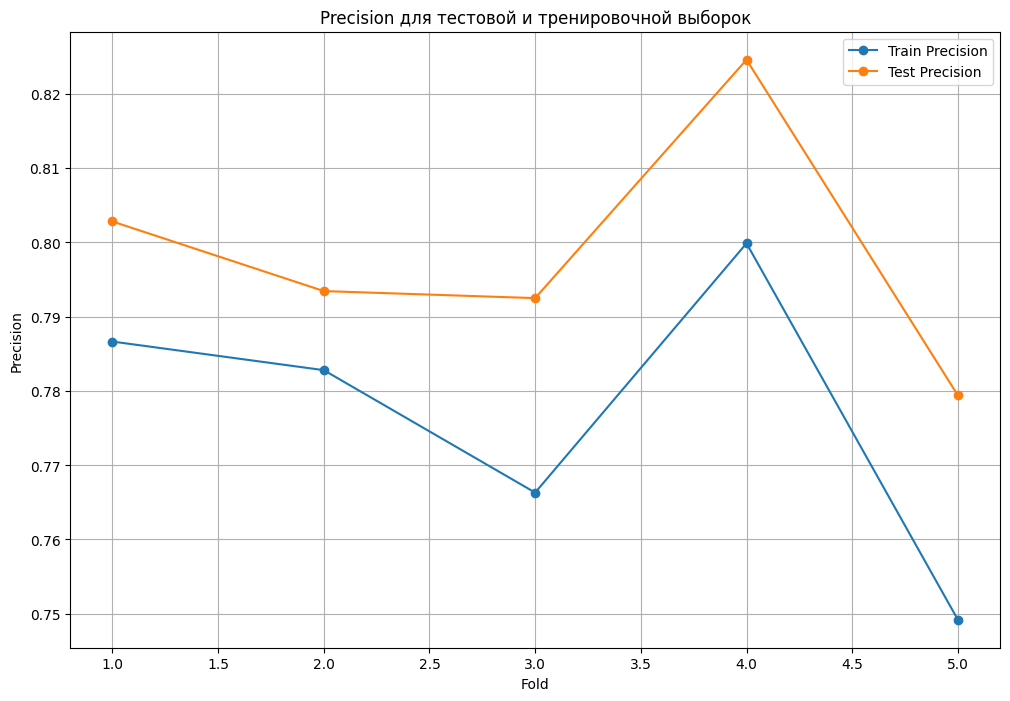

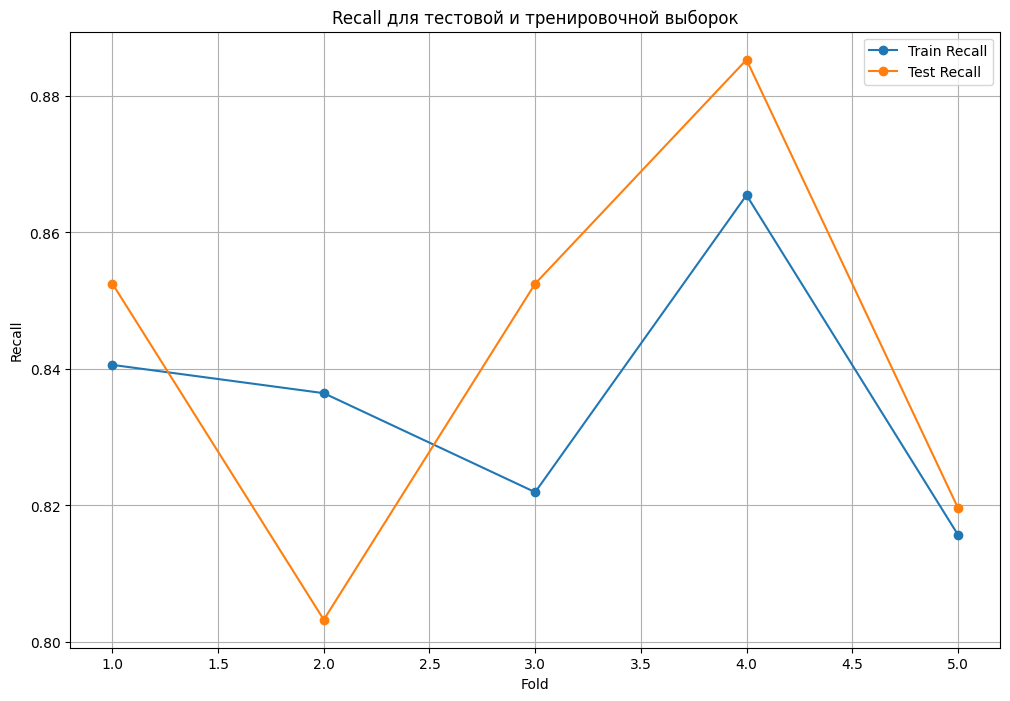

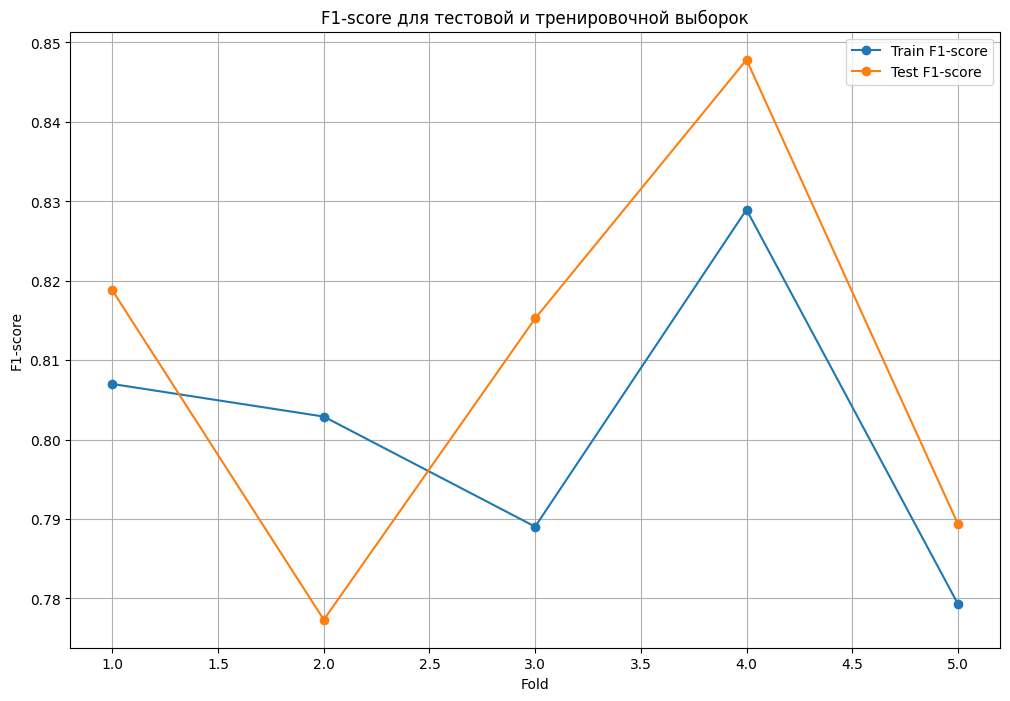

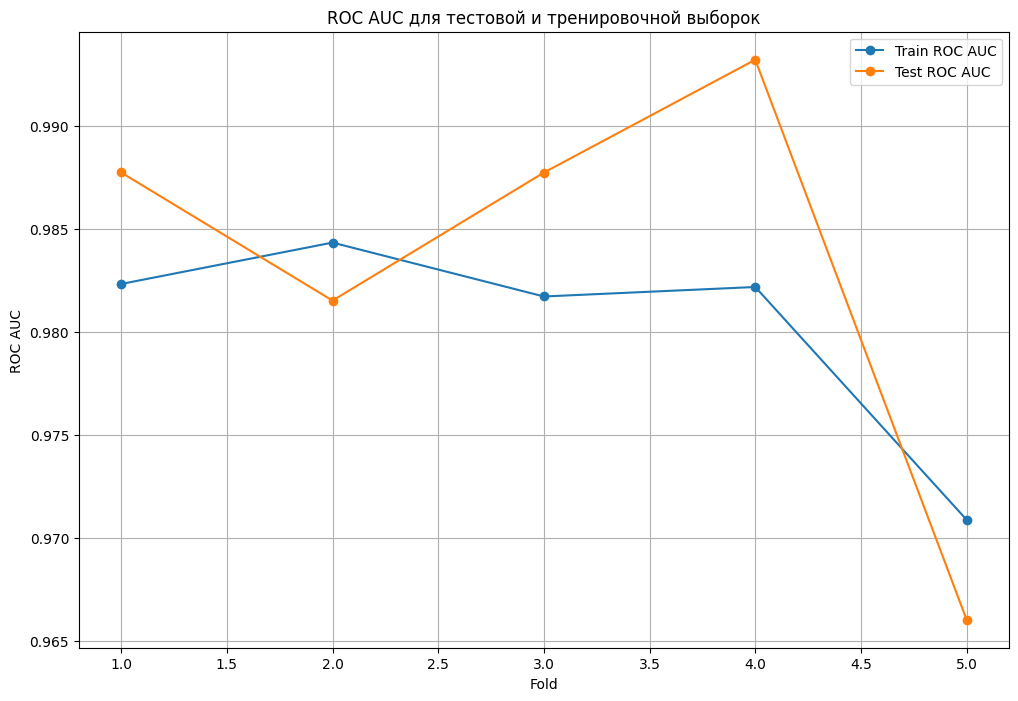

In [29]:

plt.figure(figsize=(12, 8))
plt.plot(range(1, len(train_accs) + 1), train_accs, label='Train Accuracy', marker='o')
plt.plot(range(1, len(test_accs) + 1), test_accs, label='Test Accuracy', marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy для тестовой и тренировочной выборок')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
plt.plot(range(1, len(train_precisions) + 1), train_precisions, label='Train Precision', marker='o')
plt.plot(range(1, len(test_precisions) + 1), test_precisions, label='Test Precision', marker='o')
plt.xlabel('Fold')
plt.ylabel('Precision')
plt.title('Precision для тестовой и тренировочной выборок')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
plt.plot(range(1, len(train_recalls) + 1), train_recalls, label='Train Recall', marker='o')
plt.plot(range(1, len(test_recalls) + 1), test_recalls, label='Test Recall', marker='o')
plt.xlabel('Fold')
plt.ylabel('Recall')
plt.title('Recall для тестовой и тренировочной выборок')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
plt.plot(range(1, len(train_f1s) + 1), train_f1s, label='Train F1-score', marker='o')
plt.plot(range(1, len(test_f1s) + 1), test_f1s, label='Test F1-score', marker='o')
plt.xlabel('Fold')
plt.ylabel('F1-score')
plt.title('F1-score для тестовой и тренировочной выборок')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
plt.plot(range(1, len(train_rocs) + 1), train_rocs, label='Train ROC AUC', marker='o')
plt.plot(range(1, len(test_rocs) + 1), test_rocs, label='Test ROC AUC', marker='o')
plt.xlabel('Fold')
plt.ylabel('ROC AUC')
plt.title('ROC AUC для тестовой и тренировочной выборок')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
train_accs, test_accs = [], []
train_precisions, test_precisions = [], []
train_recalls, test_recalls = [], []
train_f1s, test_f1s = [], []
train_rocs, test_rocs = [], []

train_totalf1_last = []
val_totalf1_last = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):

    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    model.Kfold = CatBoostClassifier(
        iterations=100,
        learning_rate=0.05,
        depth=4,
        l2_leaf_reg=10,
        loss_function='MultiClass',
        eval_metric='TotalF1',    
        cat_features=X.columns.tolist(),  
        verbose=100,
        random_seed=42,
        early_stopping_rounds=20,
        used_ram_limit='32gb',
        thread_count=1,
        bagging_temperature=0.8
    )

    model.Kfold.fit(
        X_train_fold,
        y_train_fold,
        eval_set=(X_val_fold, y_val_fold),
        use_best_model=True,
        verbose=10
    )

    results = model.Kfold.evals_result_
    train_totalf1_last.append(results['learn']['TotalF1'][-1])
    val_totalf1_last.append(results['validation']['TotalF1'][-1])

    print(f"\033[1mFold {fold+1}\033[0m")

    train_accuracy = accuracy_score(y_train, model.Kfold.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.Kfold.predict(X_test))
    print(f"Train accuracy: {train_accuracy}")
    print(f"Test accuracy: {test_accuracy}")

    train_precision = precision_score(y_train, model.Kfold.predict(X_train), average='weighted')
    test_precision = precision_score(y_test, model.Kfold.predict(X_test), average='weighted')
    print(f"Train precision: {train_precision}")
    print(f"Test precision: {test_precision}")

    train_recall = recall_score(y_train, model.Kfold.predict(X_train), average='weighted')
    test_recall = recall_score(y_test, model.Kfold.predict(X_test), average='weighted')
    print(f"Train recall: {train_recall}")
    print(f"Test recall: {test_recall}")

    train_f1 = f1_score(y_train, model.Kfold.predict(X_train), average='weighted')
    test_f1 = f1_score(y_test, model.Kfold.predict(X_test), average='weighted')
    print(f"Train F1-score: {train_f1}")
    print(f"Test F1-score: {test_f1}")

    train_roc_auc = roc_auc_score(y_train, model.Kfold.predict_proba(X_train), multi_class='ovr')
    test_roc_auc = roc_auc_score(y_test, model.Kfold.predict_proba(X_test), multi_class='ovr')
    print(f"Train ROC AUC: {train_roc_auc}")
    print(f"Test ROC AUC: {test_roc_auc}")

    train_accs.append(train_accuracy)
    test_accs.append(test_accuracy)
    train_precisions.append(train_precision)
    test_precisions.append(test_precision)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
    train_rocs.append(train_roc_auc)
    test_rocs.append(test_roc_auc)

    train_precision_ = precision_score(y_train, model.predict(X_train), average=None)
    test_precision_ = precision_score(y_test, model.predict(X_test), average=None)

    train_recall_ = recall_score(y_train, model.predict(X_train), average=None)
    test_recall_ = recall_score(y_test, model.predict(X_test), average=None)

    train_f1_ = f1_score(y_train, model.predict(X_train), average=None)
    test_f1_ = f1_score(y_test, model.predict(X_test), average=None)

    classes = model.classes_

    print("Train:")
    for i, cls in enumerate(classes):
        print(f"{cls}: Precision={train_precision_[i]:.3f}, Recall={train_recall_[i]:.3f}, F1={train_f1_[i]:.3f}")

    print("\nTest:")
    for i, cls in enumerate(classes):
        print(f"{cls}: Precision={test_precision_[i]:.3f}, Recall={test_recall_[i]:.3f}, F1={test_f1_[i]:.3f}")

    fold_labels = [f"Fold {i+1}" for i in range(len(train_accs))]


print("\n\033[1mСреднее метрик каждого фолда:\033[0m")
print(f"Mean Train Accuracy: {np.mean(train_accs):.4f}")
print(f"Mean Test Accuracy: {np.mean(test_accs):.4f}")
print(f"Mean Train Precision: {np.mean(train_precisions):.4f}")
print(f"Mean Test Precision: {np.mean(test_precisions):.4f}")
print(f"Mean Train Recall: {np.mean(train_recalls):.4f}")
print(f"Mean Test Recall: {np.mean(test_recalls):.4f}")
print(f"Mean Train F1-score: {np.mean(train_f1s):.4f}")
print(f"Mean Test F1-score: {np.mean(test_f1s):.4f}")
print(f"Mean Train ROC AUC: {np.mean(train_rocs):.4f}")
print(f"Mean Test ROC AUC: {np.mean(test_rocs):.4f}")


0:	learn: 0.5076429	test: 0.4882101	best: 0.4882101 (0)	total: 581ms	remaining: 57.5s
10:	learn: 0.6232059	test: 0.5778471	best: 0.6031150 (8)	total: 5.31s	remaining: 43s
20:	learn: 0.6741763	test: 0.6376538	best: 0.6376538 (20)	total: 9.89s	remaining: 37.2s
30:	learn: 0.7385144	test: 0.6746249	best: 0.6746249 (30)	total: 14.5s	remaining: 32.3s
40:	learn: 0.7477834	test: 0.6930816	best: 0.7015467 (37)	total: 19.1s	remaining: 27.5s
50:	learn: 0.7738999	test: 0.7232571	best: 0.7338949 (47)	total: 23.7s	remaining: 22.8s
60:	learn: 0.8037874	test: 0.7621858	best: 0.7621858 (60)	total: 28.3s	remaining: 18.1s
70:	learn: 0.8170264	test: 0.7631680	best: 0.7719547 (69)	total: 33s	remaining: 13.5s
80:	learn: 0.8226837	test: 0.7650939	best: 0.7731080 (72)	total: 37.6s	remaining: 8.82s
90:	learn: 0.8202765	test: 0.7650939	best: 0.7731080 (72)	total: 42.3s	remaining: 4.18s
99:	learn: 0.8252403	test: 0.7720204	best: 0.7814734 (97)	total: 46.4s	remaining: 0us

bestTest = 0.7814734174
bestIteration = 

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train recall: 0.8405797101449275
Test recall: 0.8524590163934426
Train F1-score: 0.8069915682897351
Test F1-score: 0.8187613843351548
Train ROC AUC: 0.9823293156276183
Test ROC AUC: 0.9877447779768183


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.887, Recall=0.859, F1=0.873
NSS: Precision=0.608, Recall=0.966, F1=0.746
PA: Precision=0.883, Recall=0.841, F1=0.862
PB: Precision=0.934, Recall=0.891, F1=0.912
SPT: Precision=0.946, Recall=0.972, F1=0.959
SS: Precision=0.850, Recall=0.540, F1=0.660

Test:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.800, Recall=0.500, F1=0.615
NSS: Precision=0.519, Recall=0.933, F1=0.667
PA: Precision=0.800, Recall=1.000, F1=0.889
PB: Precision=1.000, Recall=0.875, F1=0.933
SPT: Precision=1.000, Recall=1.000, F1=1.000
SS: Precision=1.000, Recall=0.375, F1=0.545
0:	learn: 0.4888059	test: 0.4640372	best: 0.4640372 (0)	total: 447ms	remaining: 44.3s
10:	learn: 0.5722180	test: 0.5729185	best: 0.5769270 (1)	total: 5s	remaining: 40.5s
20:	learn: 0.6137811	test: 0.6315315	best: 0.6315315 (20)	total: 9.38s	remaining: 35.3s
30:	learn: 0.6483958	test: 0.6340911	best: 0.6376044 (28)	total: 13.9s	remaining: 31s
40:	lear

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train precision: 0.7827948895982858
Test precision: 0.7934426229508197
Train recall: 0.8364389233954451
Test recall: 0.8032786885245902
Train F1-score: 0.802891536986596
Test F1-score: 0.7773289097059589
Train ROC AUC: 0.984339309216162
Test ROC AUC: 0.9815223114971152
Train:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.887, Recall=0.859, F1=0.873
NSS: Precision=0.608, Recall=0.966, F1=0.746
PA: Precision=0.883, Recall=0.841, F1=0.862
PB: Precision=0.934, Recall=0.891, F1=0.912
SPT: Precision=0.946, Recall=0.972, F1=0.959
SS: Precision=0.850, Recall=0.540, F1=0.660

Test:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.800, Recall=0.500, F1=0.615
NSS: Precision=0.519, Recall=0.933, F1=0.667
PA: Precision=0.800, Recall=1.000, F1=0.889
PB: Precision=1.000, Recall=0.875, F1=0.933
SPT: Precision=1.000, Recall=1.000, F1=1.000
SS: Precision=1.000, Recall=0.375, F1=0.545


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0:	learn: 0.4871503	test: 0.4089260	best: 0.4089260 (0)	total: 438ms	remaining: 43.3s
10:	learn: 0.6300781	test: 0.5721905	best: 0.5738323 (9)	total: 4.9s	remaining: 39.7s
20:	learn: 0.6676751	test: 0.5825472	best: 0.6068727 (19)	total: 9.25s	remaining: 34.8s
30:	learn: 0.7359500	test: 0.6582097	best: 0.6645824 (28)	total: 13.6s	remaining: 30.2s
40:	learn: 0.7498625	test: 0.6718760	best: 0.6754145 (31)	total: 17.9s	remaining: 25.7s
50:	learn: 0.7627690	test: 0.7161553	best: 0.7161553 (50)	total: 22.3s	remaining: 21.4s
60:	learn: 0.7701271	test: 0.7491408	best: 0.7497356 (56)	total: 26.6s	remaining: 17s
70:	learn: 0.7863034	test: 0.7749828	best: 0.7749828 (70)	total: 31.1s	remaining: 12.7s
80:	learn: 0.7993695	test: 0.7832473	best: 0.7832473 (79)	total: 35.5s	remaining: 8.32s
90:	learn: 0.8105703	test: 0.7913556	best: 0.7913556 (82)	total: 39.9s	remaining: 3.94s
99:	learn: 0.8128746	test: 0.7912912	best: 0.7913556 (82)	total: 43.8s	remaining: 0us

bestTest = 0.7913555584
bestIteration =

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train recall: 0.8219461697722568
Test recall: 0.8524590163934426
Train F1-score: 0.7890394999266451
Test F1-score: 0.81524367008811
Train ROC AUC: 0.9817210197631265
Test ROC AUC: 0.9877405925454678


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.887, Recall=0.859, F1=0.873
NSS: Precision=0.608, Recall=0.966, F1=0.746
PA: Precision=0.883, Recall=0.841, F1=0.862
PB: Precision=0.934, Recall=0.891, F1=0.912
SPT: Precision=0.946, Recall=0.972, F1=0.959
SS: Precision=0.850, Recall=0.540, F1=0.660

Test:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.800, Recall=0.500, F1=0.615
NSS: Precision=0.519, Recall=0.933, F1=0.667
PA: Precision=0.800, Recall=1.000, F1=0.889
PB: Precision=1.000, Recall=0.875, F1=0.933
SPT: Precision=1.000, Recall=1.000, F1=1.000
SS: Precision=1.000, Recall=0.375, F1=0.545
0:	learn: 0.4365351	test: 0.3741769	best: 0.3741769 (0)	total: 458ms	remaining: 45.3s
10:	learn: 0.6042423	test: 0.5573478	best: 0.5599728 (9)	total: 5.2s	remaining: 42s
20:	learn: 0.6318716	test: 0.5903556	best: 0.5948775 (18)	total: 9.86s	remaining: 37.1s
30:	learn: 0.6691441	test: 0.6661536	best: 0.6661536 (30)	total: 14.5s	remaining: 32.2s
40:	le

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train recall: 0.865424430641822
Test recall: 0.8852459016393442
Train F1-score: 0.8289303773480807
Test F1-score: 0.8477988314053888
Train ROC AUC: 0.9821827897788072
Test ROC AUC: 0.9932229495571815


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.887, Recall=0.859, F1=0.873
NSS: Precision=0.608, Recall=0.966, F1=0.746
PA: Precision=0.883, Recall=0.841, F1=0.862
PB: Precision=0.934, Recall=0.891, F1=0.912
SPT: Precision=0.946, Recall=0.972, F1=0.959
SS: Precision=0.850, Recall=0.540, F1=0.660

Test:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.800, Recall=0.500, F1=0.615
NSS: Precision=0.519, Recall=0.933, F1=0.667
PA: Precision=0.800, Recall=1.000, F1=0.889
PB: Precision=1.000, Recall=0.875, F1=0.933
SPT: Precision=1.000, Recall=1.000, F1=1.000
SS: Precision=1.000, Recall=0.375, F1=0.545
0:	learn: 0.3940966	test: 0.3399963	best: 0.3399963 (0)	total: 455ms	remaining: 45s
10:	learn: 0.5972191	test: 0.5411215	best: 0.5578465 (8)	total: 5.11s	remaining: 41.4s
20:	learn: 0.6420630	test: 0.5995387	best: 0.6000000 (14)	total: 9.71s	remaining: 36.5s
30:	learn: 0.7286192	test: 0.6335332	best: 0.6335332 (30)	total: 14.3s	remaining: 31.9s
40:	l

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train recall: 0.8157349896480331
Test recall: 0.819672131147541
Train F1-score: 0.7793213066837779
Test F1-score: 0.7893965063736164
Train ROC AUC: 0.9708734484658684
Test ROC AUC: 0.9660189085625627
Train:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.887, Recall=0.859, F1=0.873
NSS: Precision=0.608, Recall=0.966, F1=0.746
PA: Precision=0.883, Recall=0.841, F1=0.862
PB: Precision=0.934, Recall=0.891, F1=0.912
SPT: Precision=0.946, Recall=0.972, F1=0.959
SS: Precision=0.850, Recall=0.540, F1=0.660

Test:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.800, Recall=0.500, F1=0.615
NSS: Precision=0.519, Recall=0.933, F1=0.667
PA: Precision=0.800, Recall=1.000, F1=0.889
PB: Precision=1.000, Recall=0.875, F1=0.933
SPT: Precision=1.000, Recall=1.000, F1=1.000
SS: Precision=1.000, Recall=0.375, F1=0.545

Среднее метрик каждого фолда:
Mean Train Accuracy: 0.8360
Mean Test Accuracy: 0.8426
Mean Train Precision: 0.7770
Mean Test Precision: 0.7985
Mean Trai

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


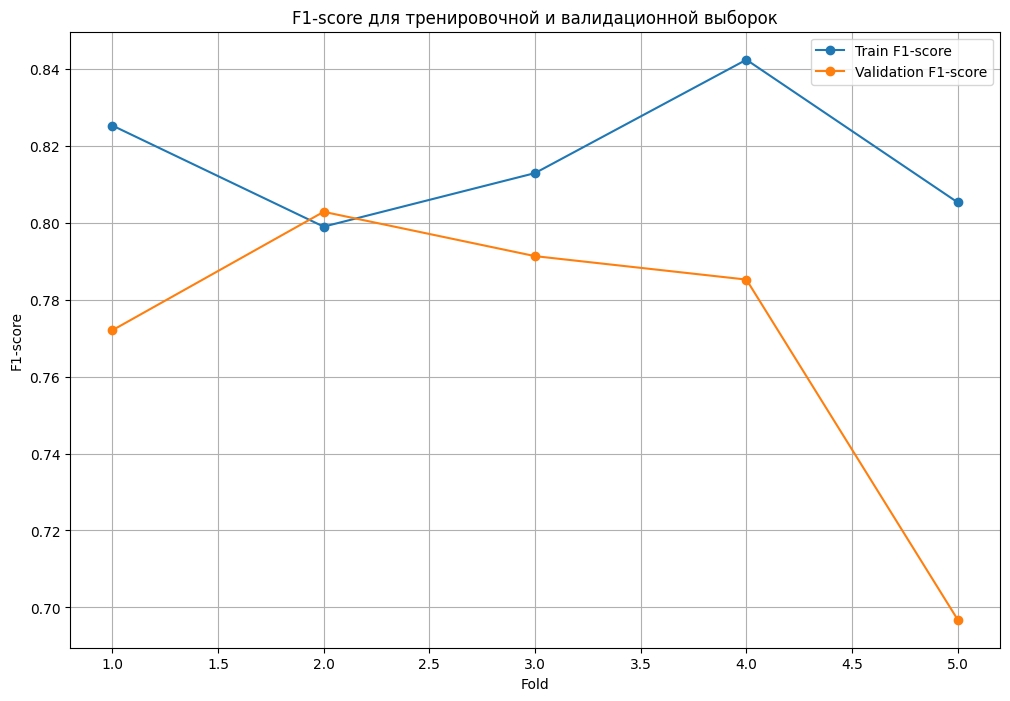

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(train_totalf1_last) + 1), train_totalf1_last, label='Train F1-score', marker='o')
plt.plot(range(1, len(val_totalf1_last) + 1), val_totalf1_last, label='Validation F1-score', marker='o')
plt.xlabel('Fold')
plt.ylabel('F1-score')
plt.title('F1-score для тренировочной и валидационной выборок')
plt.legend()
plt.grid(True)
plt.show()

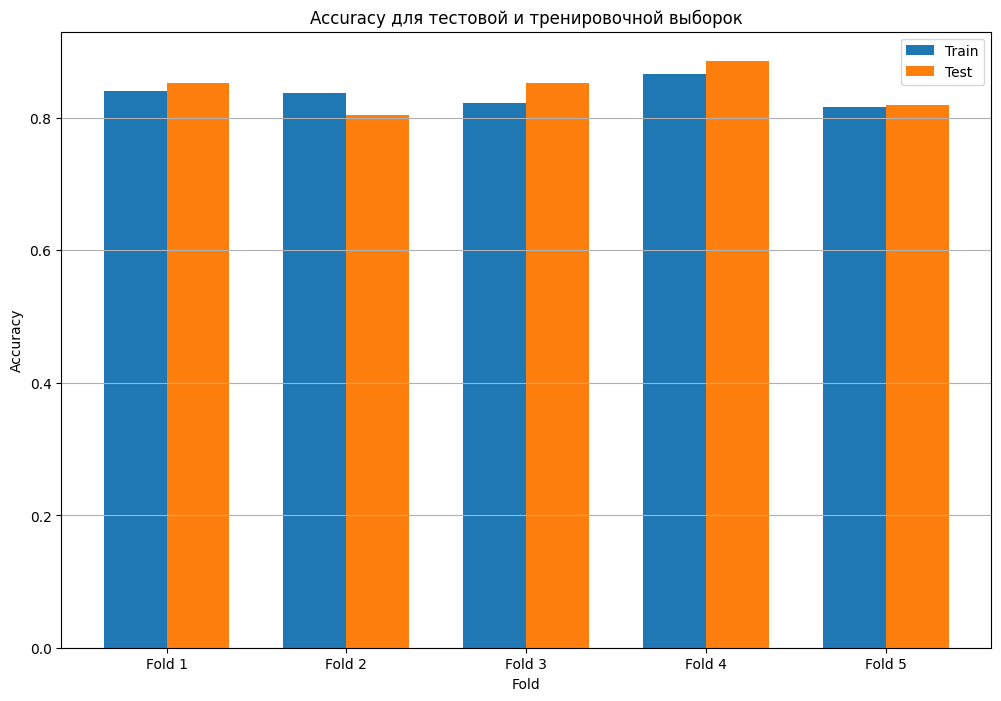

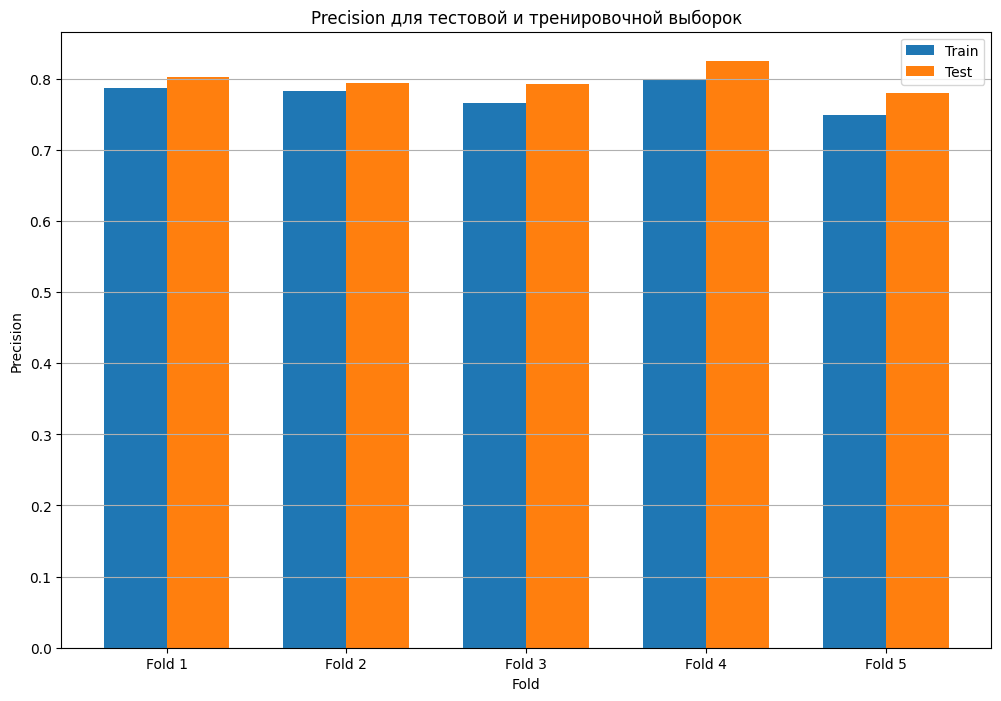

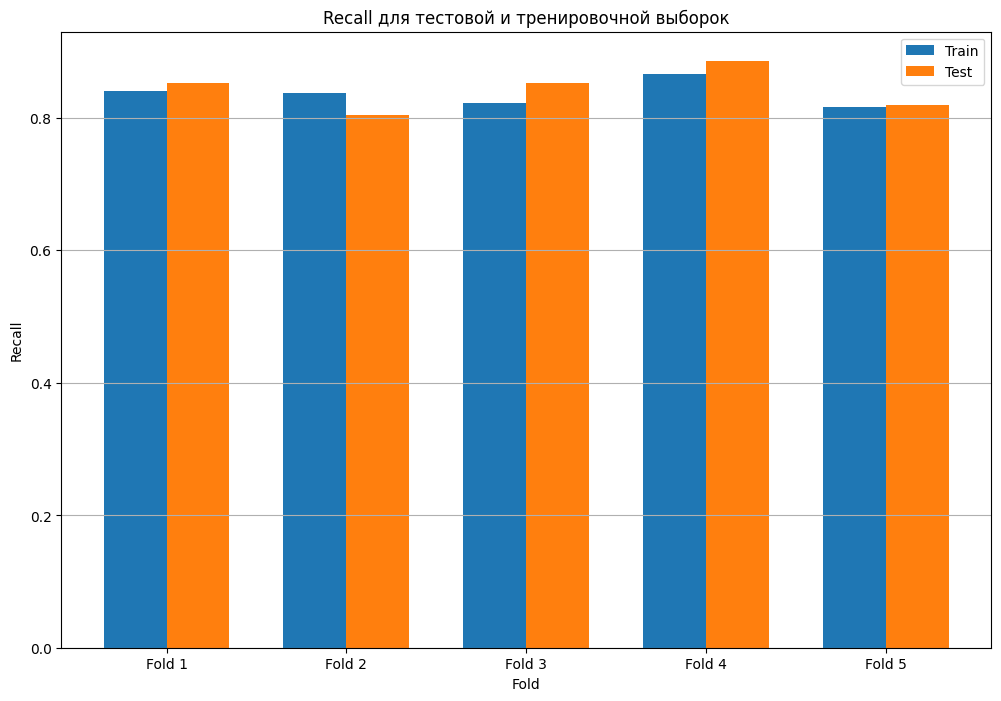

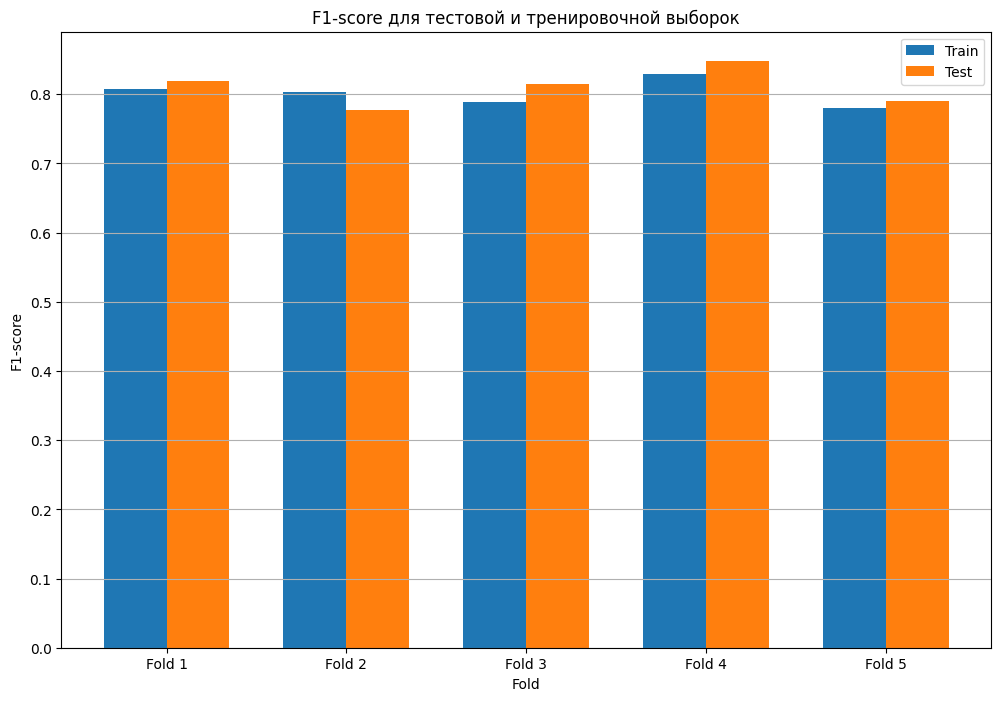

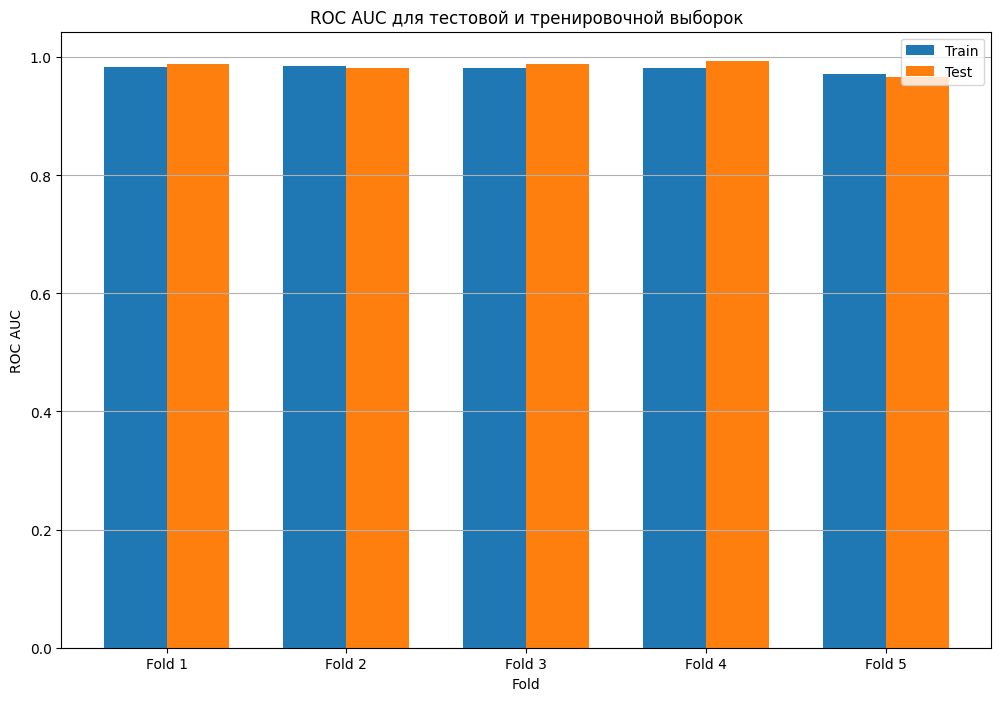

In [38]:

folds = np.arange(1, len(train_accs) + 1)
bar_width = 0.35

def plot_bar_comparison(metric_train, metric_test, ylabel, title):
    x = np.arange(len(metric_train))
    plt.figure(figsize=(12, 8))
    plt.bar(x - bar_width / 2, metric_train, width=bar_width, label='Train')
    plt.bar(x + bar_width / 2, metric_test, width=bar_width, label='Test')
    plt.xlabel('Fold')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(ticks=x, labels=[f"Fold {i+1}" for i in x])
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()


plot_bar_comparison(train_accs, test_accs, 'Accuracy', 'Accuracy для тестовой и тренировочной выборок')

plot_bar_comparison(train_precisions, test_precisions, 'Precision', 'Precision для тестовой и тренировочной выборок')

plot_bar_comparison(train_recalls, test_recalls, 'Recall', 'Recall для тестовой и тренировочной выборок')

plot_bar_comparison(train_f1s, test_f1s, 'F1-score', 'F1-score для тестовой и тренировочной выборок')

plot_bar_comparison(train_rocs, test_rocs, 'ROC AUC', 'ROC AUC для тестовой и тренировочной выборок')


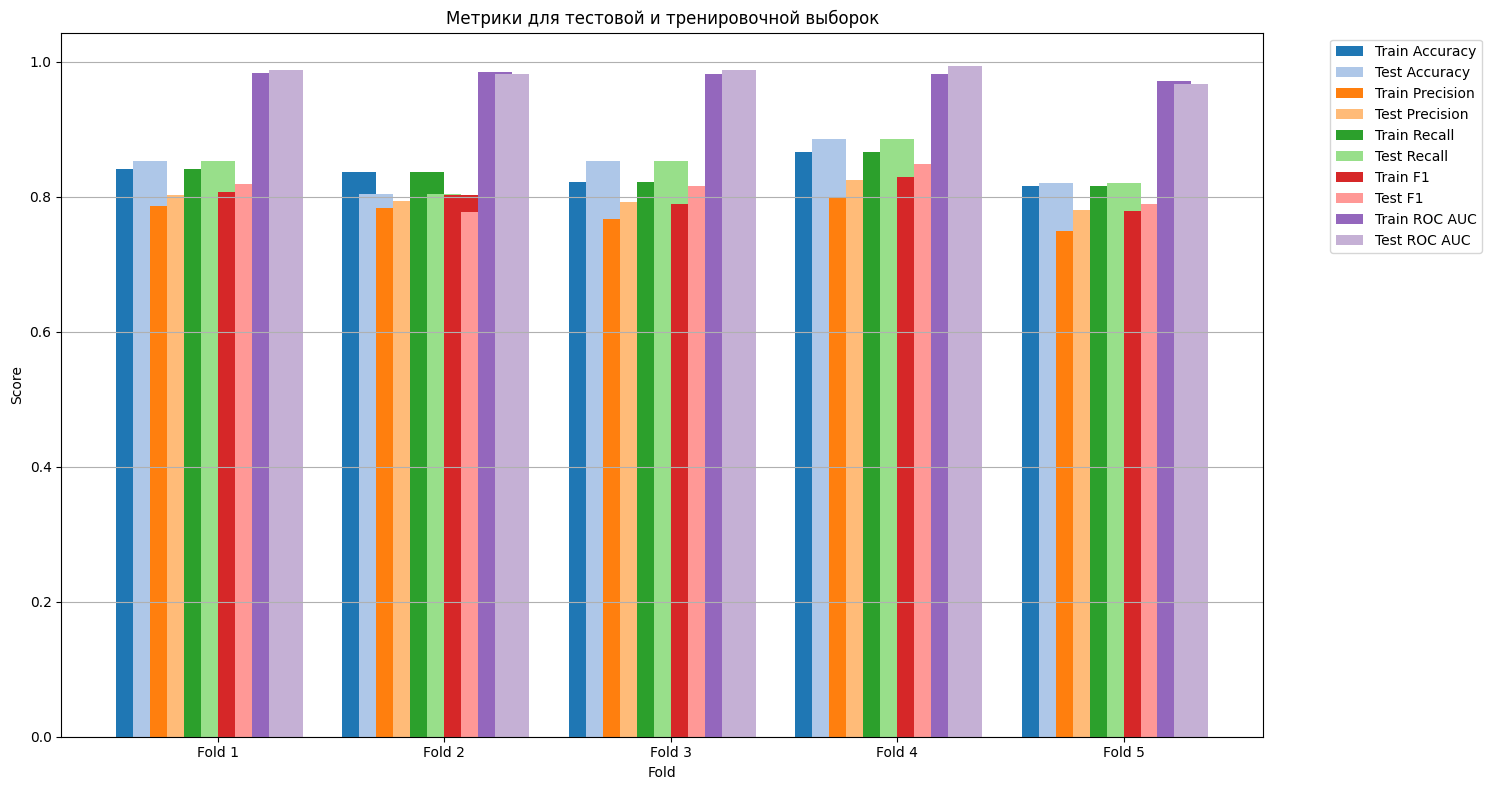

In [48]:
plt.figure(figsize=(15, 8))
bar_width = 0.15
x = np.arange(len(train_accs))

colors_train = [
    '#1f77b4',  
    '#ff7f0e',  
    '#2ca02c',  
    '#d62728',  
    '#9467bd'   
]

colors_test = [
    '#aec7e8',  
    '#ffbb78',  
    '#98df8a', 
    '#ff9896',  
    '#c5b0d5'   
]

metrics = [
    ('Accuracy', train_accs, test_accs),
    ('Precision', train_precisions, test_precisions),
    ('Recall', train_recalls, test_recalls),
    ('F1', train_f1s, test_f1s),
    ('ROC AUC', train_rocs, test_rocs)
]

for i, (name, train, test) in enumerate(metrics):
    offset = bar_width * i
    plt.bar(
        x + offset - bar_width * len(metrics) / 2, 
        train, 
        width=bar_width, 
        label=f'Train {name}',
        color=colors_train[i]  
    )
    plt.bar(
        x + offset - bar_width * len(metrics) / 2 + bar_width / 2, 
        test, 
        width=bar_width, 
        label=f'Test {name}',
        color=colors_test[i]  
    )

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Метрики для тестовой и тренировочной выборок')
plt.xticks(ticks=x, labels=[f"Fold {i+1}" for i in x])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()